In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
%matplotlib inline

In [2]:
df=pd.read_csv("/kaggle/input/starbucks-reviews-dataset/reviews_data.csv")

In [3]:
mask=np.array(Image.open("/kaggle/input/wodcloud-twiter-pic/twitter.png"))

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
df.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [6]:
df.shape

(850, 6)

In [7]:
df.isnull().sum()

name             0
location         0
Date             0
Rating         145
Review           0
Image_Links      0
dtype: int64

In [8]:
mean_rating = df['Rating'].mean()
df['Rating'].fillna(mean_rating, inplace=True)

/tmp/ipykernel_1050/2105247043.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(mean_rating, inplace=True)


In [9]:
df.isnull().sum()

name           0
location       0
Date           0
Rating         0
Review         0
Image_Links    0
dtype: int64

In [10]:
df["Rating"]=df["Rating"].astype(int)

In [11]:
df["Rating"].value_counts()

Rating
1    596
2     99
5     83
4     39
3     33
Name: count, dtype: int64

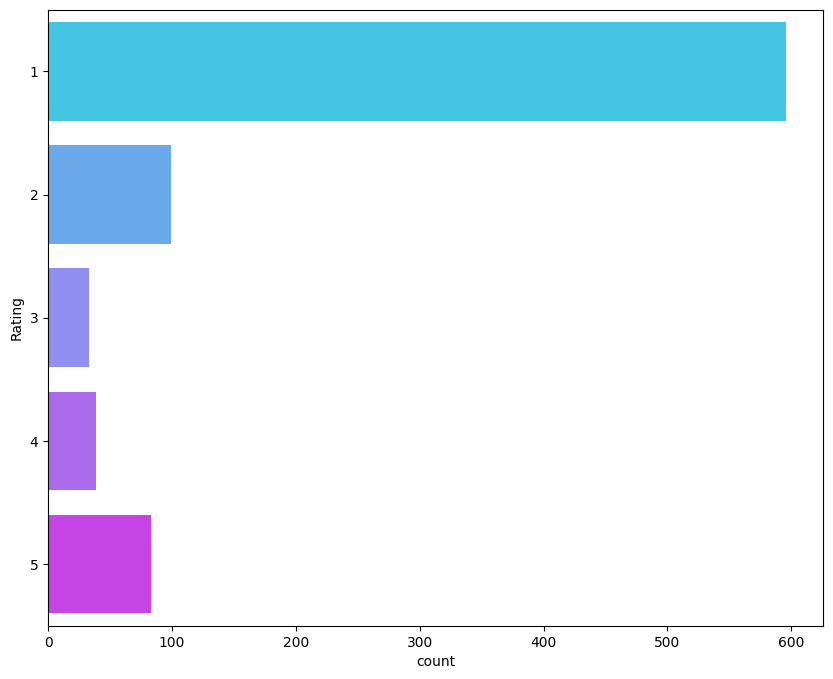

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(y="Rating",data=df,palette="cool")
plt.show()

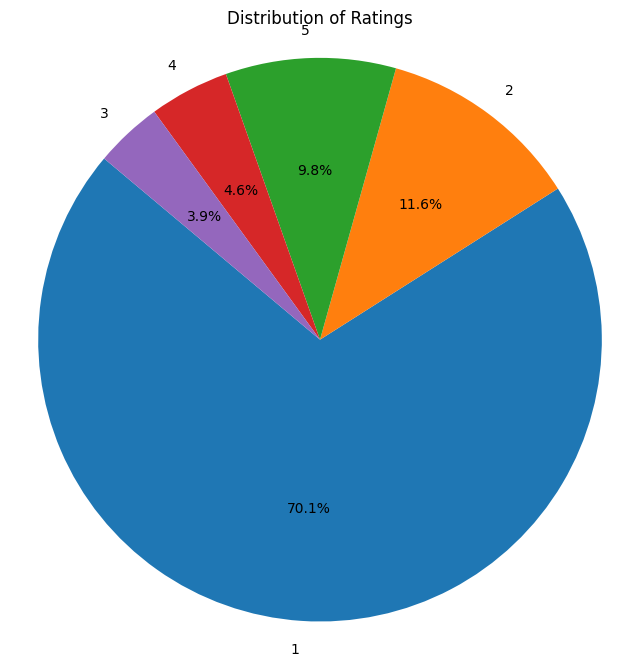

In [13]:
rating_counts = df["Rating"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings')
plt.axis('equal')
plt.show()

In [14]:
df["location"].value_counts()

location
New York, NY         14
Los Angeles, CA      12
Seattle, WA          11
Chicago, IL           9
Las Vegas, NV         8
                     ..
Red Deer, Alberta     1
Medfield, MA          1
Orland, CA            1
Framingham, MA        1
Kamloops, BC          1
Name: count, Length: 633, dtype: int64

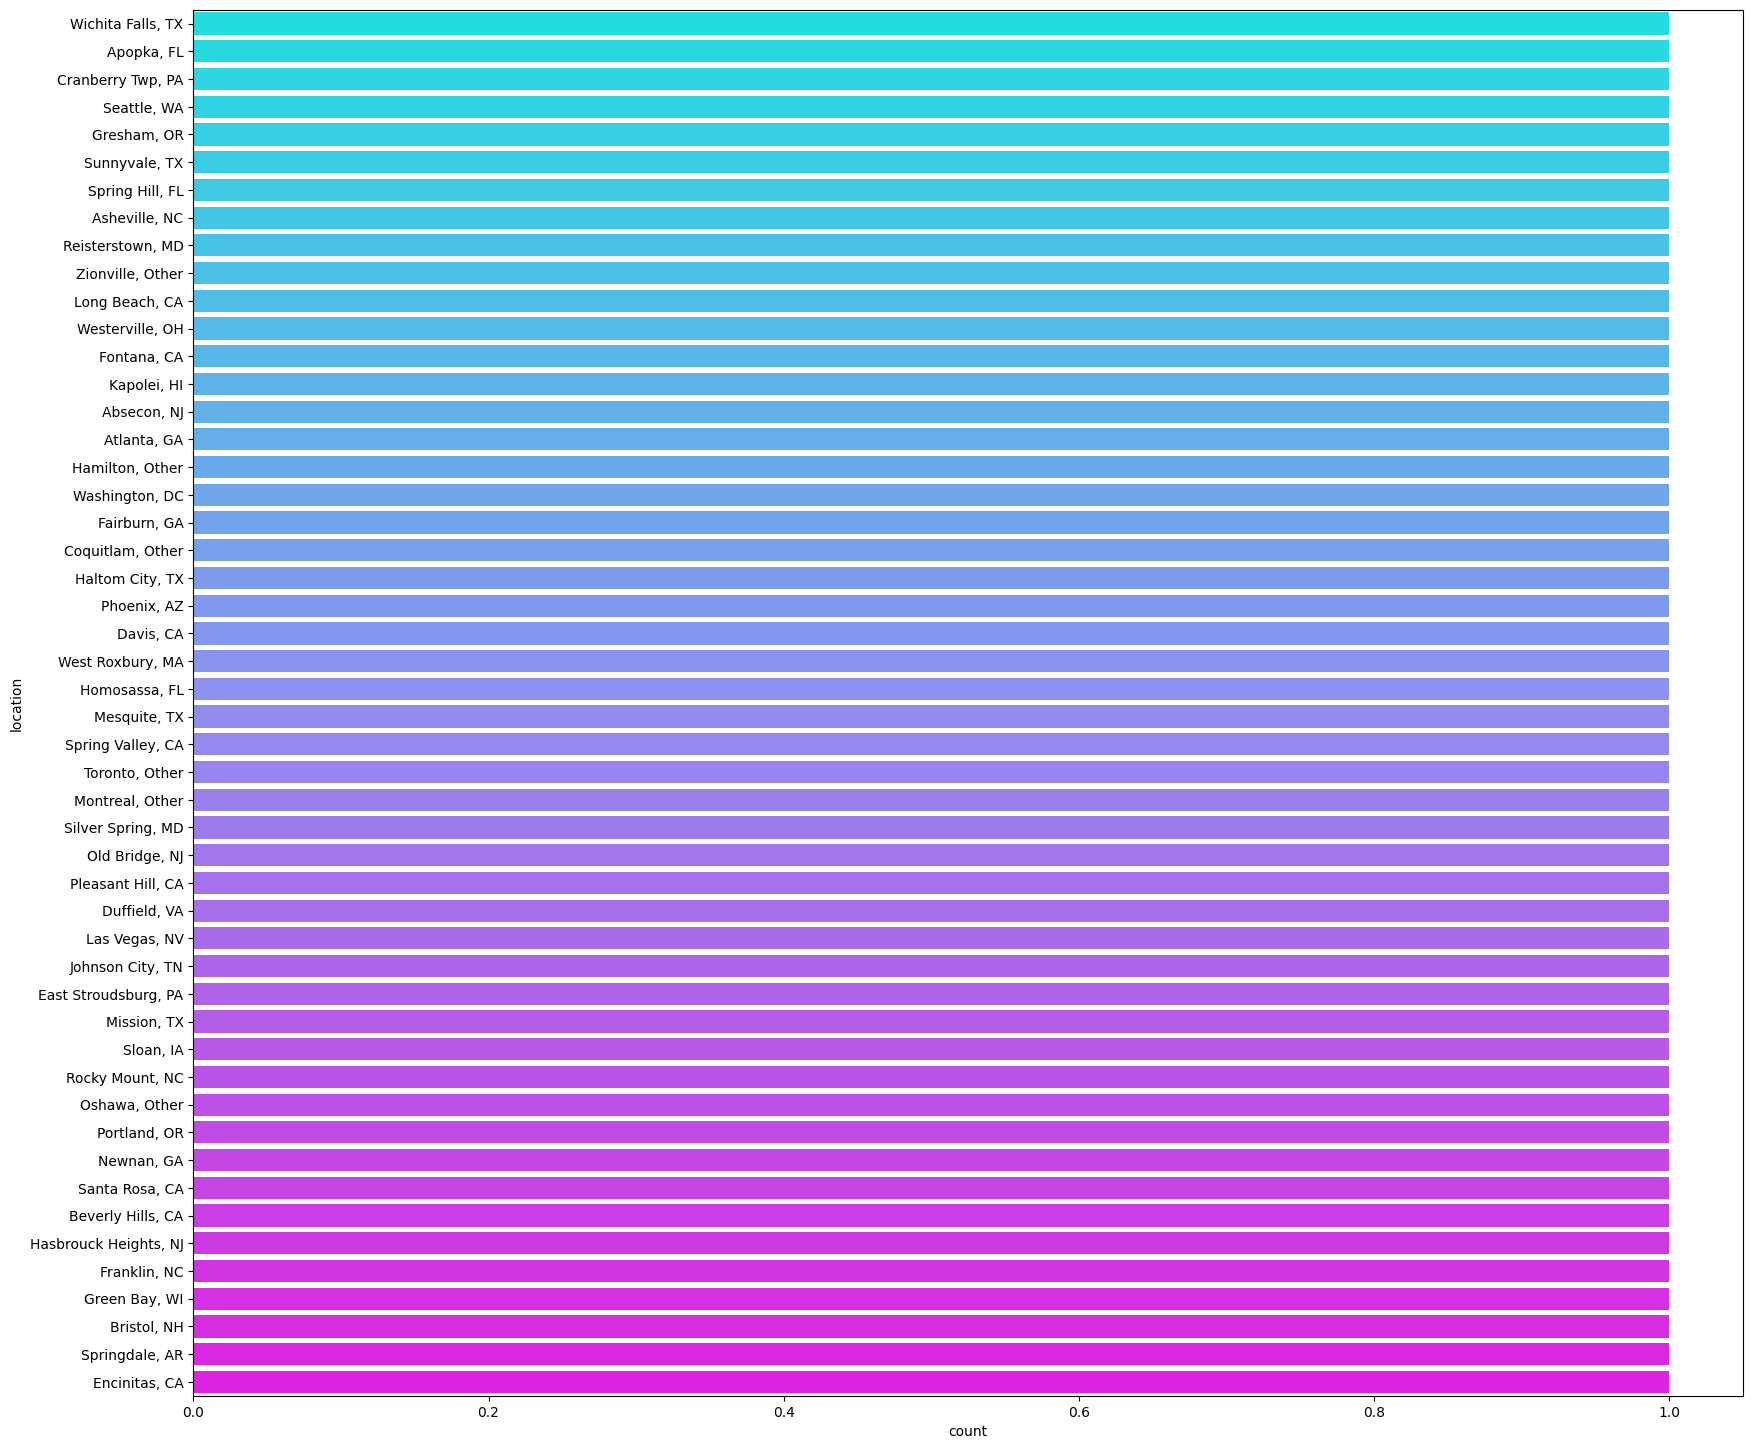

In [15]:
plt.figure(figsize=(20,18))
sns.countplot(y="location",data=df[:50],palette="cool")
plt.show()

In [16]:
df.drop(columns=["name","location","Date","Image_Links"],axis=1,inplace=True)

In [17]:
df.head()

,Rating,Review
0,5,Amber and LaDonna at the Starbucks on Southwes...
1,5,** at the Starbucks by the fire station on 436...
2,5,I just wanted to go out of my way to recognize...
3,5,Me and my friend were at Starbucks and my card...
4,5,I’m on this kick of drinking 5 cups of warm wa...


In [18]:
def map_sentiment(score):
    if score in [1, 2]:
        return 'Negative'
    elif score == 3:
        return 'Neutral'
    elif score in [4, 5]:
        return 'Positive'
    else:
        return 'Unknown'  
df['Rating'] = df.Rating.apply(map_sentiment)

In [19]:
df.rename(columns={"Rating":"label"},inplace=True)
df.rename(columns={"Review":"text"},inplace=True)

In [20]:
df["label"].value_counts()

label
Negative    695
Positive    122
Neutral      33
Name: count, dtype: int64

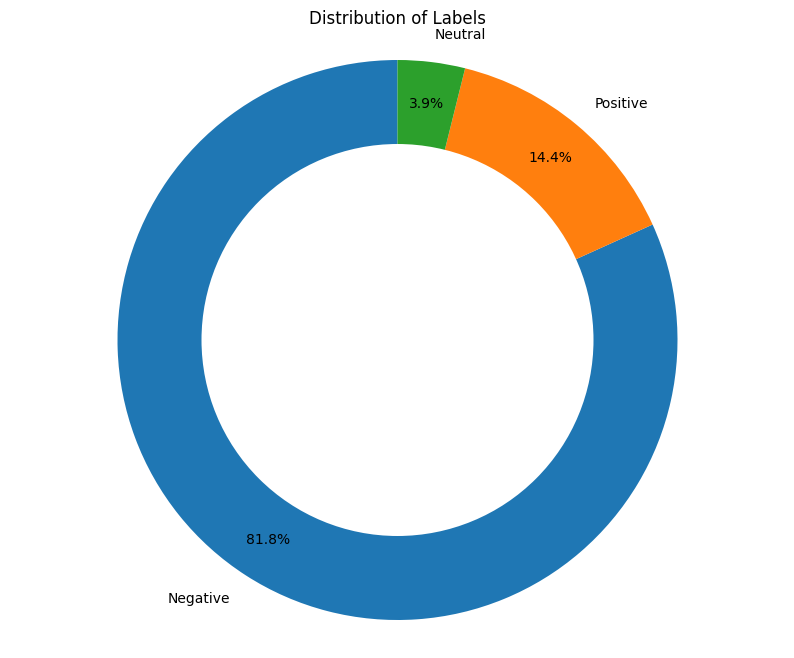

In [21]:
label_counts = df["label"].value_counts()

plt.figure(figsize=(10,8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title('Distribution of Labels')
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.axis('equal')
plt.show()

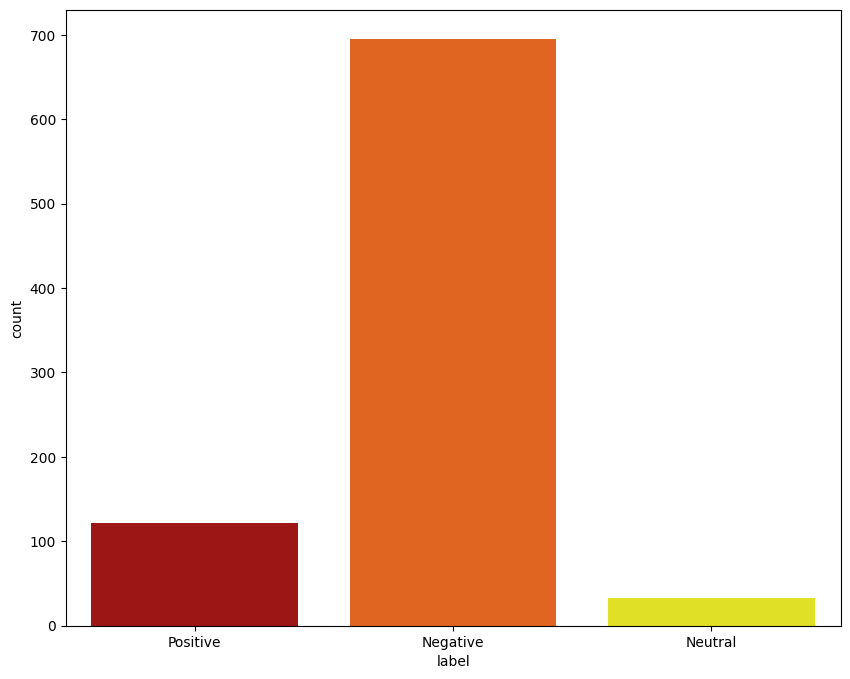

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(x="label",data=df,palette="hot")
plt.show()

# Negative Wordcloud

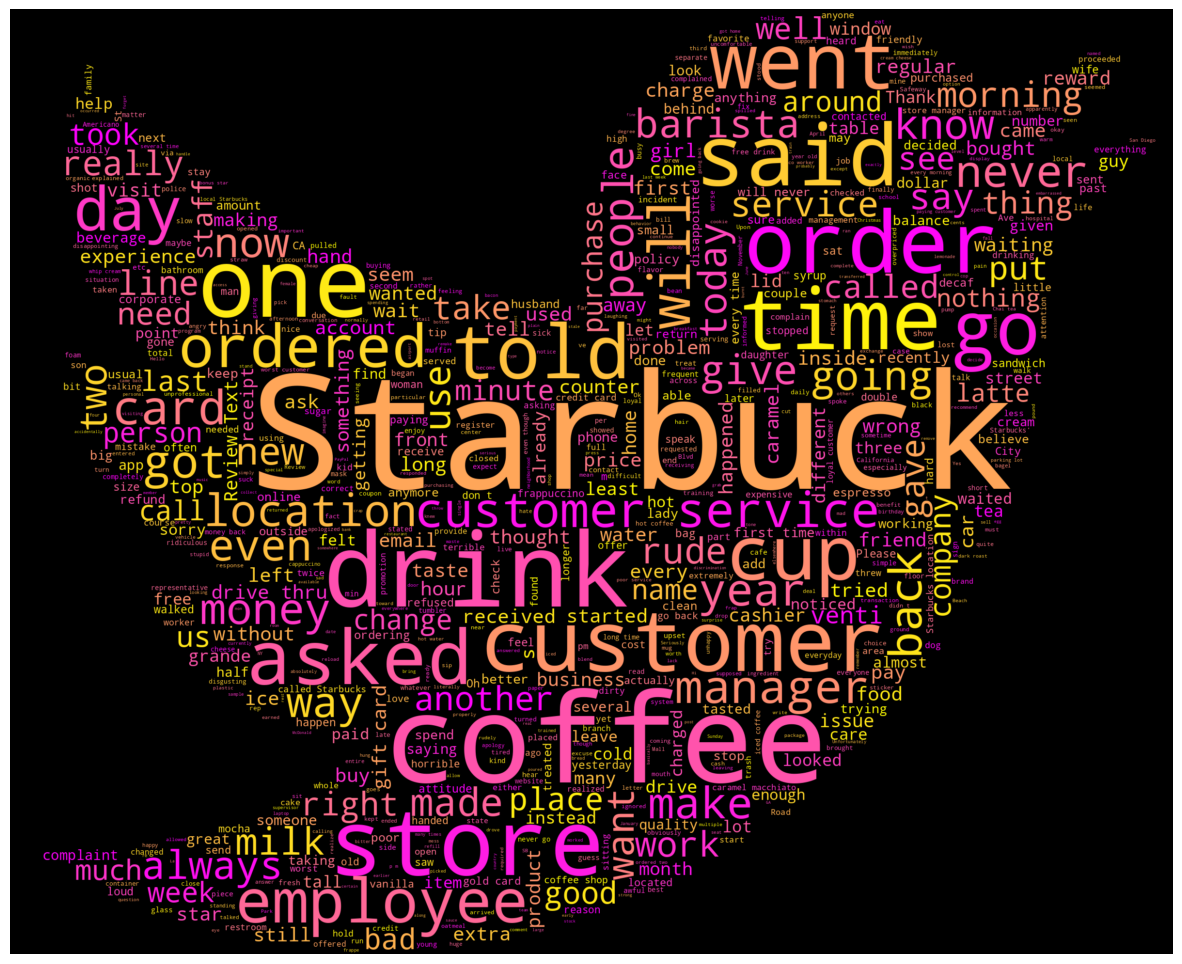

In [23]:
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(15,15))
negative_wordcloud=df[df["label"]=="Negative"]
negative_text=" ".join(negative_wordcloud['text'].values.tolist())
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='black', max_words=800,colormap="spring",mask=mask).generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Positive Wordcloud

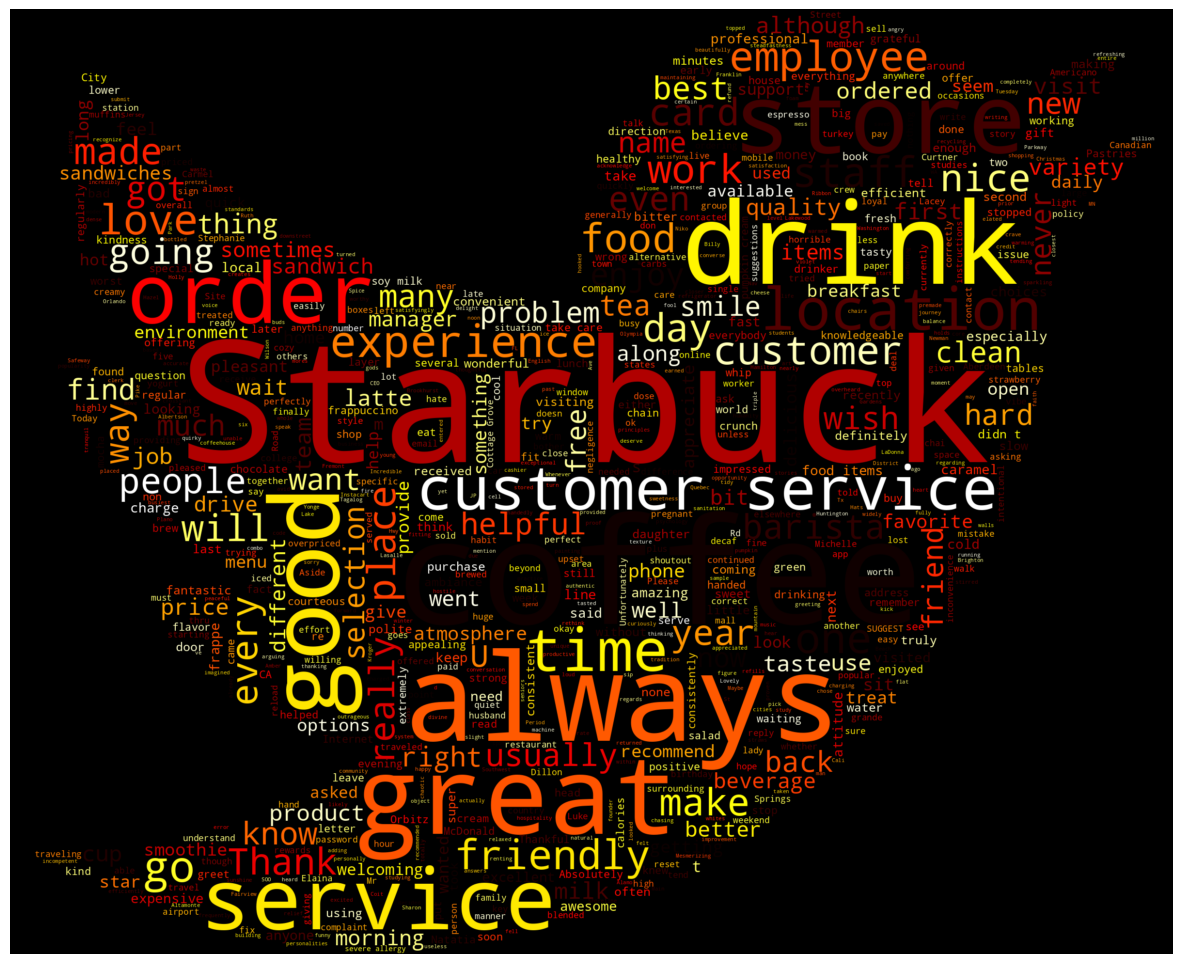

In [24]:
plt.figure(figsize=(15,15))
positive_wordcloud=df[df["label"]=="Positive"]
positive_text=" ".join(positive_wordcloud['text'].values.tolist())
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='black', max_words=800,colormap="hot",mask=mask).generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Neutral Wordcloud

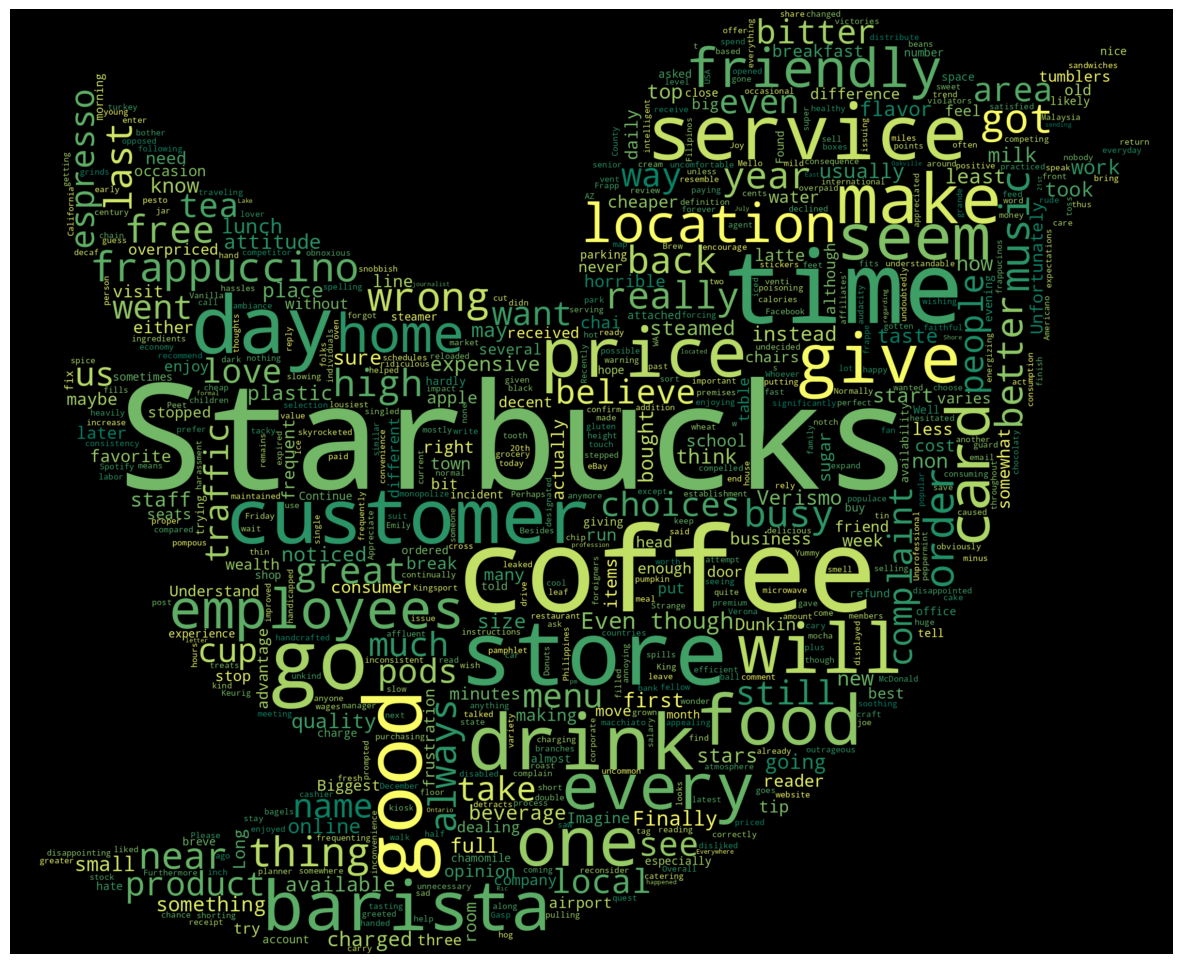

In [25]:
plt.figure(figsize=(15,15))
neutral_wordcloud=df[df["label"]=="Neutral"]
neutral_text=" ".join(neutral_wordcloud['text'].values.tolist())
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='black', max_words=800,colormap="summer",mask=mask).generate(neutral_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 30 Most Common Words From Positive Text

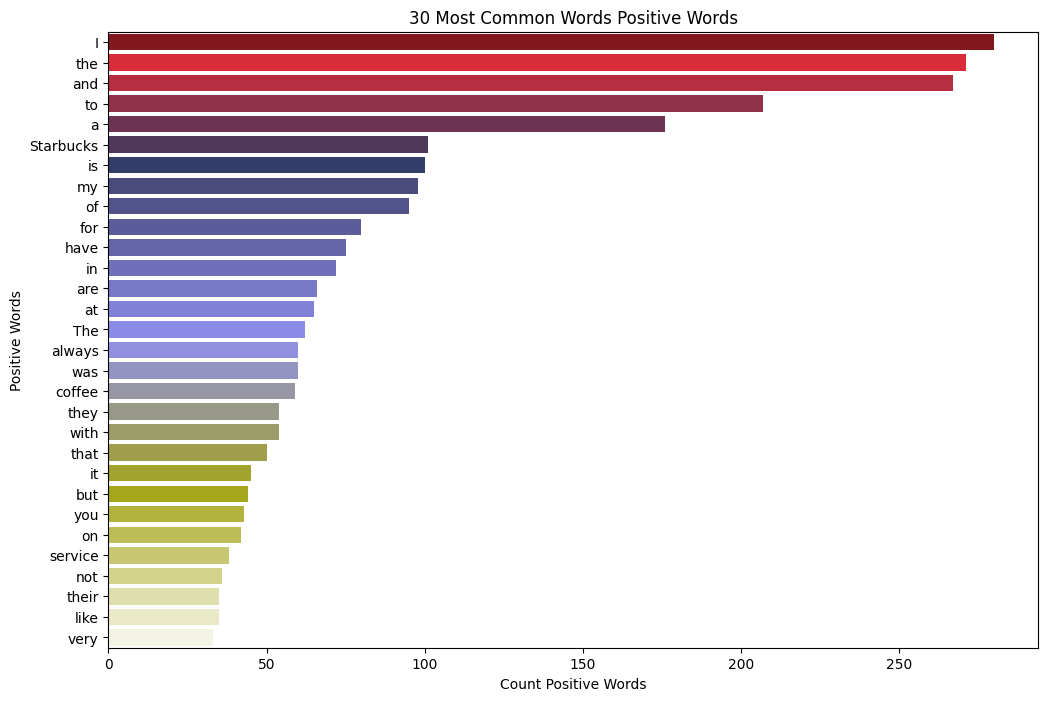

In [26]:
from collections import Counter

positive_text = df[df["label"] == "Positive"]
data_set = positive_text["text"].str.split()
all_words = [word for sublist in data_set for word in sublist]
counter = Counter(all_words)
common_words = counter.most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=df_common_words,palette="gist_stern")
plt.title('30 Most Common Words Positive Words')
plt.xlabel('Count Positive Words')
plt.ylabel('Positive Words')
plt.show()

# 30 Most Common Words From Negative Text

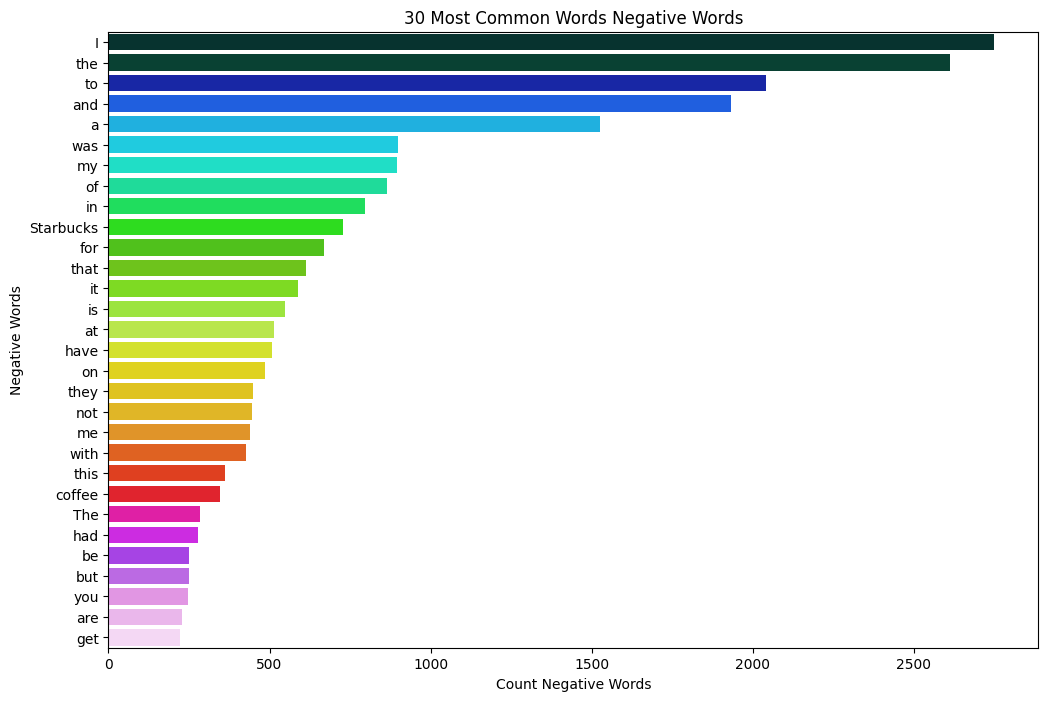

In [27]:
negative_text = df[df["label"] == "Negative"]
data_set = negative_text["text"].str.split()
all_words = [word for sublist in data_set for word in sublist]
counter = Counter(all_words)
common_words = counter.most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=df_common_words,palette="gist_ncar")
plt.title('30 Most Common Words Negative Words')
plt.xlabel('Count Negative Words')
plt.ylabel('Negative Words')
plt.show()

# 30 Most Common Words From Neutral Text

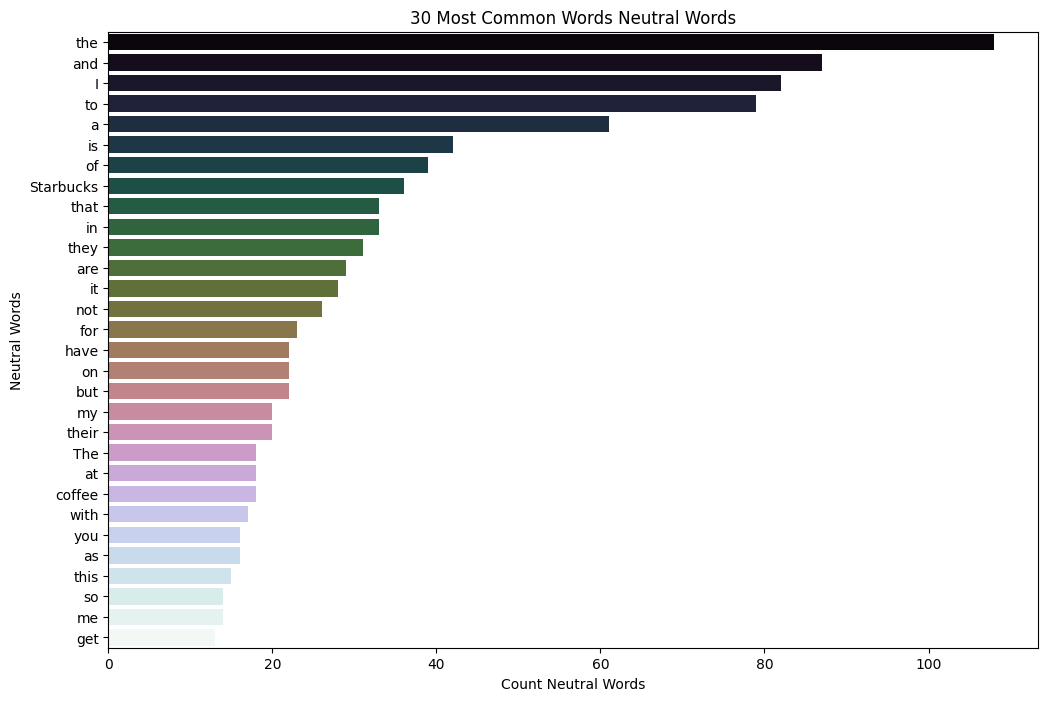

In [28]:
neutral_text = df[df["label"] == "Neutral"]
data_set = neutral_text["text"].str.split()
all_words = [word for sublist in data_set for word in sublist]
counter = Counter(all_words)
common_words = counter.most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=df_common_words,palette="cubehelix")
plt.title('30 Most Common Words Neutral Words')
plt.xlabel('Count Neutral Words')
plt.ylabel('Neutral Words')
plt.show()

In [29]:
df["text_length"]=df["text"].apply(len)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


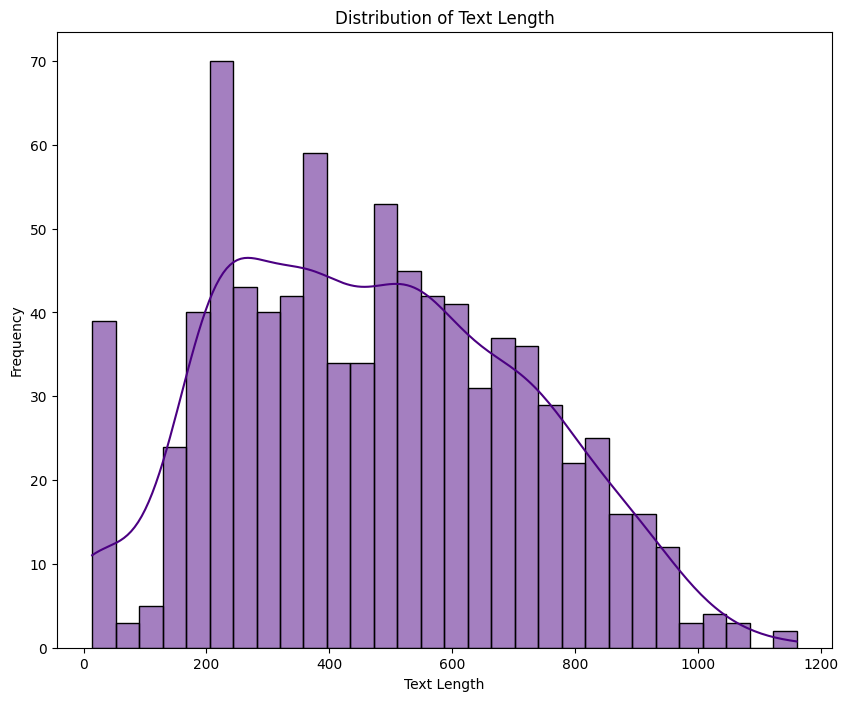

In [30]:
plt.figure(figsize=(10,8))
sns.histplot(df["text_length"], bins=30, kde=True,color="indigo")
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [31]:
avg_len=df["text"].apply(len)
avg_len=avg_len.mean()
print(f"Average Text Length is : {avg_len:.2f}")

Average Text Length is : 471.06


In [32]:
df.drop(columns=["text_length"],axis=1,inplace=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


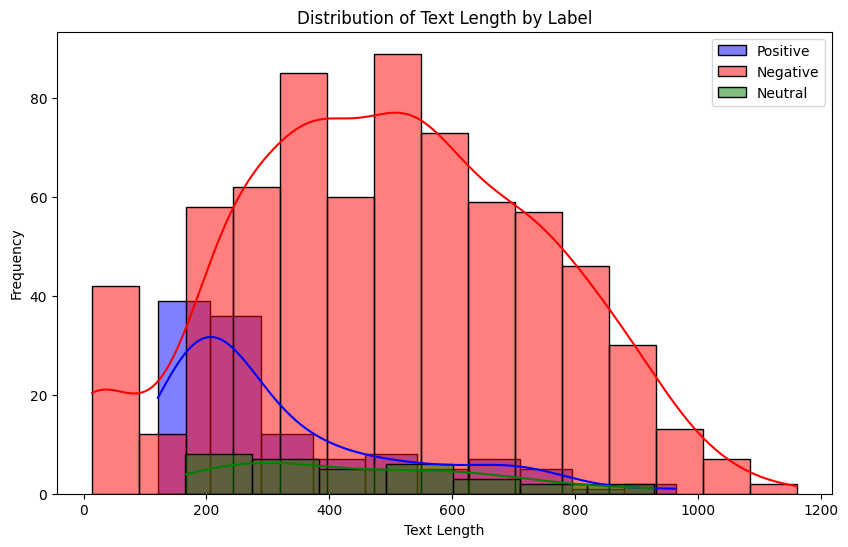

In [33]:
df_positive=df[df["label"]=="Positive"]["text"].str.len()
df_negative=df[df["label"]=="Negative"]["text"].str.len()
df_neutral=df[df["label"]=="Neutral"]["text"].str.len()
plt.figure(figsize=(10, 6))
sns.histplot(df_positive, color='blue', alpha=0.5, label='Positive', kde=True)
sns.histplot(df_negative, color='red', alpha=0.5, label='Negative', kde=True)
sns.histplot(df_neutral, color='green', alpha=0.5, label='Neutral', kde=True)

plt.title('Distribution of Text Length by Label')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [34]:
df["label"].replace({"Positive": 0, "Negative": 1, "Neutral": 2}, inplace=True)


/tmp/ipykernel_1050/394854992.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["label"].replace({"Positive": 0, "Negative": 1, "Neutral": 2}, inplace=True)
/tmp/ipykernel_1050/394854992.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["label"].replace({"Positive": 0, "Negative": 1, "Neut

In [35]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
max_len=400
sample_text=df["text"].iloc[0]
tokenize_data= tokenizer(sample_text, return_tensors='pt', padding=True, truncation=True, max_length=max_len)
print("=======================================================================================================")
print("\n")
print(f"Orginal Text : {sample_text}")
print("\n")
print("=======================================================================================================")
print("=======================================================================================================")
print("=======================================================================================================")
print("\n")
print(f"Encoded Text : {tokenize_data}")




Orginal Text : Amber and LaDonna at the Starbucks on Southwest Parkway are always so warm and welcoming. There is always a smile in their voice when they greet you at the drive-thru. And their customer service is always spot-on, they always get my order right and with a smile. I would actually give them more than 5 stars if they were available.




Encoded Text : {'input_ids': tensor([[    0,   250, 34707,     8,  1587,  6766,  2133,    23,     5, 10173,
            15,  7577, 15787,    32,   460,    98,  3279,     8, 10423,     4,
           345,    16,   460,    10,  6675,    11,    49,  2236,    77,    51,
         17395,    47,    23,     5,  1305,    12,   212,  2070,     4,   178,
            49,  2111,   544,    16,   460,  1514,    12,   261,     6,    51,
           460,   120,   127,   645,   235,     8,    19,    10,  6675,     4,
            38,    74,   888,   492,   106,    55,    87,   195,  2690,   114,
            51,    58,   577,     4,     2]]), 'attention_mask': 

In [36]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=42)

In [37]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
class_distribution=Counter(df_train["label"])
print(f"Class Distribution Before Random Oversampling : {class_distribution}")

Class Distribution Before Random Oversampling : Counter({1: 566, 0: 86, 2: 28})


In [38]:
df_train.head()

,label,text
332,2,Starbucks their daily coffee is good but not g...
383,1,"Recently, I noticed that the card balance went..."
281,1,"Dear Starbucks Team, received poor service in ..."
2,0,I just wanted to go out of my way to recognize...
231,1,"DO NOT drink at STARBUCKS St. Leonards, Ringwo..."


In [39]:
X=df_train.drop(columns="label",axis=1)
Y=df_train["label"]

In [40]:
print("Shapes of X and Y before oversampling:")
print("X shape:", X.shape)
print("Y shape:", Y.shape)

Shapes of X and Y before oversampling:
X shape: (680, 1)
Y shape: (680,)


In [41]:
os=RandomOverSampler(random_state=42)
X_new,Y_new = os.fit_resample(X,Y)
df_train_resample = pd.concat([pd.DataFrame(X_new, columns=X.columns), pd.Series(Y_new, name="label")], axis=1)
df_train_resample.head()

,text,label
0,Starbucks their daily coffee is good but not g...,2
1,"Recently, I noticed that the card balance went...",1
2,"Dear Starbucks Team, received poor service in ...",1
3,I just wanted to go out of my way to recognize...,0
4,"DO NOT drink at STARBUCKS St. Leonards, Ringwo...",1


In [42]:
df_train_resample.shape

(1698, 2)

In [43]:
class_count_after=Counter(df_train_resample["label"])
print(f"After Class Distribution Random OverSampling : {class_count_after}")

After Class Distribution Random OverSampling : Counter({2: 566, 1: 566, 0: 566})


In [44]:
num_labels = len(set(df['label'].tolist()))
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=num_labels)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [45]:
num_labels

3

In [46]:
def tokenize_text(text):
    tokens = tokenizer.encode(text, add_special_tokens=True, padding=True, truncation=True, max_length=512) 
    return tokens

df_train_resample["tokenize_text"]=df_train_resample["text"].apply(tokenize_text)
df_val["tokenize_text"]=df_val["text"].apply(tokenize_text)
df_test["tokenize_text"]=df_test["text"].apply(tokenize_text)

In [47]:
df_train_resample.head()

,text,label,tokenize_text
0,Starbucks their daily coffee is good but not g...,2,"[0, 4239, 40132, 49, 1230, 3895, 16, 205, 53, ..."
1,"Recently, I noticed that the card balance went...",1,"[0, 38386, 6, 38, 5324, 14, 5, 1886, 2394, 439..."
2,"Dear Starbucks Team, received poor service in ...",1,"[0, 23314, 10173, 2711, 6, 829, 2129, 544, 11,..."
3,I just wanted to go out of my way to recognize...,0,"[0, 100, 95, 770, 7, 213, 66, 9, 127, 169, 7, ..."
4,"DO NOT drink at STARBUCKS St. Leonards, Ringwo...",1,"[0, 19174, 8127, 4076, 23, 22305, 387, 23806, ..."


In [48]:
df_val.head()

,label,text,tokenize_text
96,0,Incredible experience every time. Thankful for...,"[0, 34366, 29921, 676, 358, 86, 4, 3837, 2650,..."
30,1,"My account got blocked, I cannot log in and I ...","[0, 2387, 1316, 300, 4953, 6, 38, 1395, 7425, ..."
33,1,On 01/23/2023 I purchased Starbucks beverage l...,"[0, 4148, 9465, 73, 1922, 73, 844, 1922, 38, 3..."
49,1,I've recently realized how difficult it is to ...,"[0, 100, 348, 682, 5426, 141, 1202, 24, 16, 7,..."
433,1,I'm sure you've heard a lot of feedback on the...,"[0, 100, 437, 686, 47, 348, 1317, 10, 319, 9, ..."


In [49]:
df_test.head()

,label,text,tokenize_text
174,1,This was a drink I was really looking forward ...,"[0, 713, 21, 10, 4076, 38, 21, 269, 546, 556, ..."
731,1,"The employee was drunk and incoherent, obvious...","[0, 133, 3200, 21, 10789, 8, 41528, 33591, 6, ..."
286,1,Starbucks is getting more and more pricey for ...,"[0, 4239, 40132, 16, 562, 55, 8, 55, 26428, 13..."
696,1,I ordered a tall split drip cup coffee 1/2 bol...,"[0, 100, 2740, 10, 6764, 3462, 33807, 4946, 38..."
29,1,I bought a Caramel macchiato last night on 03/...,"[0, 100, 2162, 10, 1653, 22044, 13418, 611, 11..."


In [50]:
df_test.shape

(85, 3)

# Convert tokenized data to PyTorch tensors with padding

In [51]:
from torch.nn.utils.rnn import pad_sequence
X_train = pad_sequence([torch.tensor(seq) for seq in df_train_resample["tokenize_text"]], batch_first=True)
Y_train = torch.tensor(df_train_resample['label'].tolist())
X_val = pad_sequence([torch.tensor(seq) for seq in df_val['tokenize_text']], batch_first=True)
Y_val = torch.tensor(df_val['label'].tolist())
X_test = pad_sequence([torch.tensor(seq) for seq in df_test['tokenize_text']], batch_first=True)
Y_test = torch.tensor(df_test['label'].tolist())

In [52]:
Y_test

tensor([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 0, 2, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0])

# DataLoader

In [53]:
from torch.utils.data import TensorDataset, DataLoader
train_data=TensorDataset(X_train,Y_train)
train_dataloader = DataLoader(train_data, batch_size=8, shuffle=True)
val_data=TensorDataset(X_val,Y_val)
val_dataloader = DataLoader(val_data, batch_size=8, shuffle=True)
test_data=TensorDataset(X_test,Y_test)
test_dataloader = DataLoader(test_data, batch_size=8, shuffle=True)

# Train Loop

In [54]:
import torch.nn as nn
from tqdm import tqdm
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.00001)
criterion = nn.CrossEntropyLoss().to(device)

def train(model,dataloader,optimizer,criterion):
    model.train()
    train_loss=0.0
    for batch in tqdm(dataloader,desc="Training"):
        inputs,labels=batch
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs, labels=labels) 
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss/len(dataloader)
        


In [55]:
import torch.nn as nn
from tqdm import tqdm

model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.00001)
criterion = nn.CrossEntropyLoss().to(device)

def calculate_accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    corrects = torch.sum(preds == labels)
    accuracy = corrects.double() / len(labels)
    return accuracy.item()

def train(model, dataloader, optimizer, criterion):
    model.train()
    total_loss = 0.0
    total_accuracy = 0.0
    for batch in tqdm(dataloader, desc="Training"):
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)  # Corrected this line
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        accuracy = calculate_accuracy(outputs.logits, labels)
        total_accuracy += accuracy
    avg_loss = total_loss / len(dataloader)
    avg_accuracy = total_accuracy / len(dataloader)
    return avg_loss, avg_accuracy

def evaluate(model, dataloader, criterion):
    model.eval()
    total_loss = 0.0
    total_accuracy = 0.0
    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Validation"):
            inputs, labels = batch
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs.logits, labels)
            total_loss += loss.item()
            accuracy = calculate_accuracy(outputs.logits, labels)
            total_accuracy += accuracy
    avg_loss = total_loss / len(dataloader)
    avg_accuracy = total_accuracy / len(dataloader)
    return avg_loss, avg_accuracy

train_loss_list = []
val_loss_list = []
train_accuracy_list = []
val_accuracy_list = []

epochs = 10
for epoch in range(epochs):
    avg_train_loss, avg_train_accuracy = train(model, train_dataloader, optimizer, criterion)
    train_loss_list.append(avg_train_loss)
    train_accuracy_list.append(avg_train_accuracy)
    
    avg_val_loss, avg_val_accuracy = evaluate(model, val_dataloader, criterion)
    val_loss_list.append(avg_val_loss)
    val_accuracy_list.append(avg_val_accuracy)
    
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Train Accuracy: {avg_train_accuracy:.4f}")
    print(f"Epoch {epoch+1}/{epochs}, Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {avg_val_accuracy:.4f}")


Validation: 100%|██████████| 11/11 [00:00<00:00, 14.23it/s]


Epoch 1/10, Train Loss: 1.0660, Train Accuracy: 0.4255
Epoch 1/10, Validation Loss: 0.8817, Validation Accuracy: 0.6932


Validation: 100%|██████████| 11/11 [00:00<00:00, 14.17it/s]


Epoch 2/10, Train Loss: 0.5200, Train Accuracy: 0.8040
Epoch 2/10, Validation Loss: 0.3676, Validation Accuracy: 0.9136


Validation: 100%|██████████| 11/11 [00:00<00:00, 14.20it/s]


Epoch 3/10, Train Loss: 0.0941, Train Accuracy: 0.9718
Epoch 3/10, Validation Loss: 0.2054, Validation Accuracy: 0.9432


Validation: 100%|██████████| 11/11 [00:00<00:00, 14.19it/s]


Epoch 4/10, Train Loss: 0.0399, Train Accuracy: 0.9906
Epoch 4/10, Validation Loss: 0.2137, Validation Accuracy: 0.9545


Validation: 100%|██████████| 11/11 [00:00<00:00, 14.22it/s]


Epoch 5/10, Train Loss: 0.0112, Train Accuracy: 0.9977
Epoch 5/10, Validation Loss: 0.2664, Validation Accuracy: 0.9318


Validation: 100%|██████████| 11/11 [00:00<00:00, 14.21it/s]


Epoch 6/10, Train Loss: 0.0092, Train Accuracy: 0.9988
Epoch 6/10, Validation Loss: 0.2108, Validation Accuracy: 0.9364


Validation: 100%|██████████| 11/11 [00:00<00:00, 14.23it/s]


Epoch 7/10, Train Loss: 0.0513, Train Accuracy: 0.9842
Epoch 7/10, Validation Loss: 0.2715, Validation Accuracy: 0.9545


Validation: 100%|██████████| 11/11 [00:00<00:00, 14.17it/s]


Epoch 8/10, Train Loss: 0.0021, Train Accuracy: 1.0000
Epoch 8/10, Validation Loss: 0.3134, Validation Accuracy: 0.9364


Validation: 100%|██████████| 11/11 [00:00<00:00, 14.23it/s]


Epoch 9/10, Train Loss: 0.0015, Train Accuracy: 1.0000
Epoch 9/10, Validation Loss: 0.3621, Validation Accuracy: 0.9364


Validation: 100%|██████████| 11/11 [00:00<00:00, 14.25it/s]

Epoch 10/10, Train Loss: 0.0045, Train Accuracy: 0.9988
Epoch 10/10, Validation Loss: 0.2766, Validation Accuracy: 0.9659


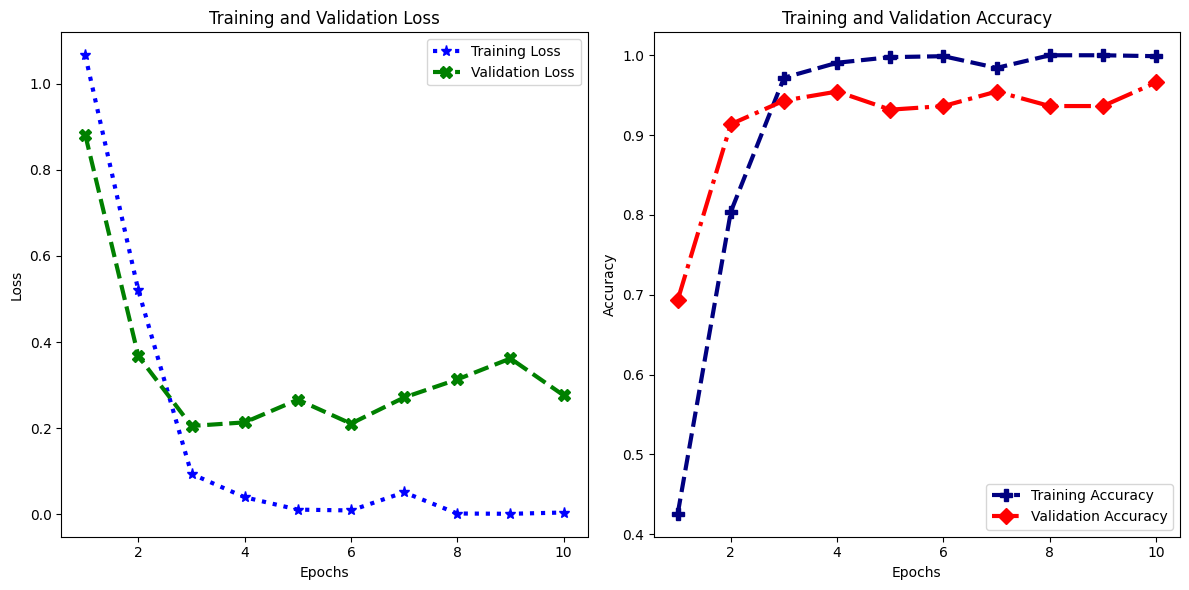

In [56]:
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss_list, label='Training Loss',color="blue",lw=3,linestyle=":",markersize=8,marker="*")
plt.plot(epochs_range, val_loss_list, label='Validation Loss',color="green",lw=3,linestyle="--",marker="X",markersize=8)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracy_list, label='Training Accuracy',color="navy",lw=3,linestyle="--",marker="P",markersize=8)
plt.plot(epochs_range, val_accuracy_list, label='Validation Accuracy',color="red",lw=3,linestyle="-.",marker="D",markersize=8)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluation Test Dataset

In [57]:
model.eval()
y_true = []
y_pred = []


with torch.no_grad():
    for batch in tqdm(test_dataloader, desc="Evaluating"):
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
      
        _, predicted = torch.max(outputs.logits, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        

y_true=np.array(["Positive","Negative","Neutral"])[y_true]
y_pred=np.array(["Positive","Negative","Neutral"])[y_pred]


Evaluating: 100%|██████████| 11/11 [00:00<00:00, 17.22it/s]


In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report, roc_auc_score
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8470588235294118


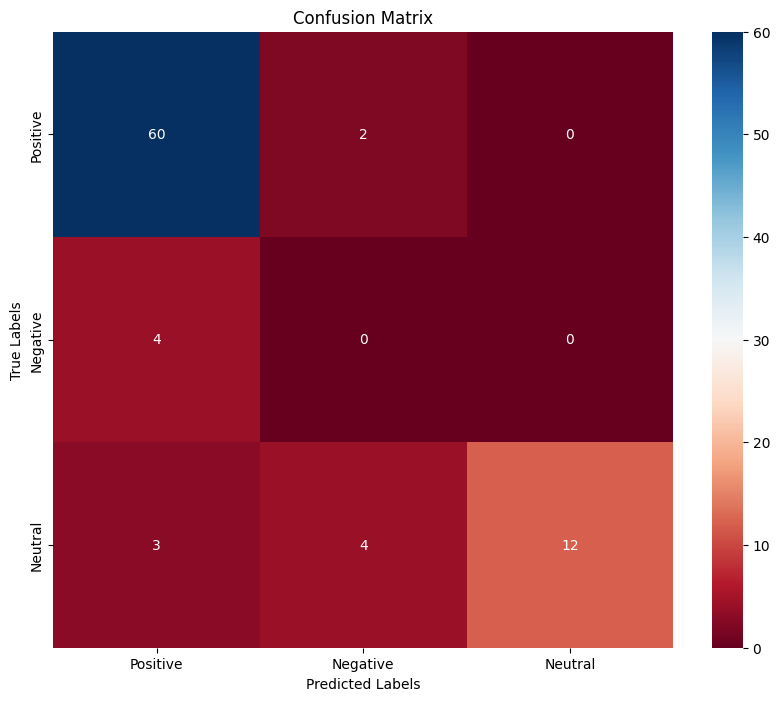

In [59]:
label_name=["Positive",'Negative',"Neutral"]
cm=confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,xticklabels=label_name,yticklabels=label_name,cmap="RdBu",fmt="d")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [60]:
print(classification_report(y_true,y_pred,target_names=label_name))

              precision    recall  f1-score   support

    Positive       0.90      0.97      0.93        62
    Negative       0.00      0.00      0.00         4
     Neutral       1.00      0.63      0.77        19

    accuracy                           0.85        85
   macro avg       0.63      0.53      0.57        85
weighted avg       0.88      0.85      0.85        85



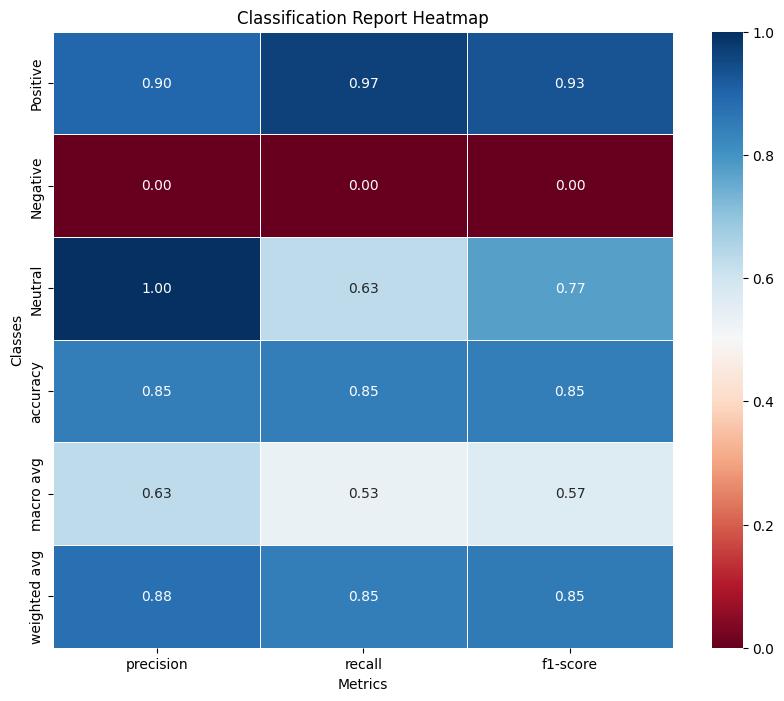

In [61]:
report = classification_report(y_true, y_pred, target_names=label_name, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df = report_df.drop(columns=['support'])

plt.figure(figsize=(10, 8))
sns.heatmap(report_df, annot=True, cmap="RdBu", fmt=".2f", linewidths=0.5)

plt.title('Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Classes')

plt.show()

Evaluating: 100%|██████████| 11/11 [00:00<00:00, 17.32it/s]


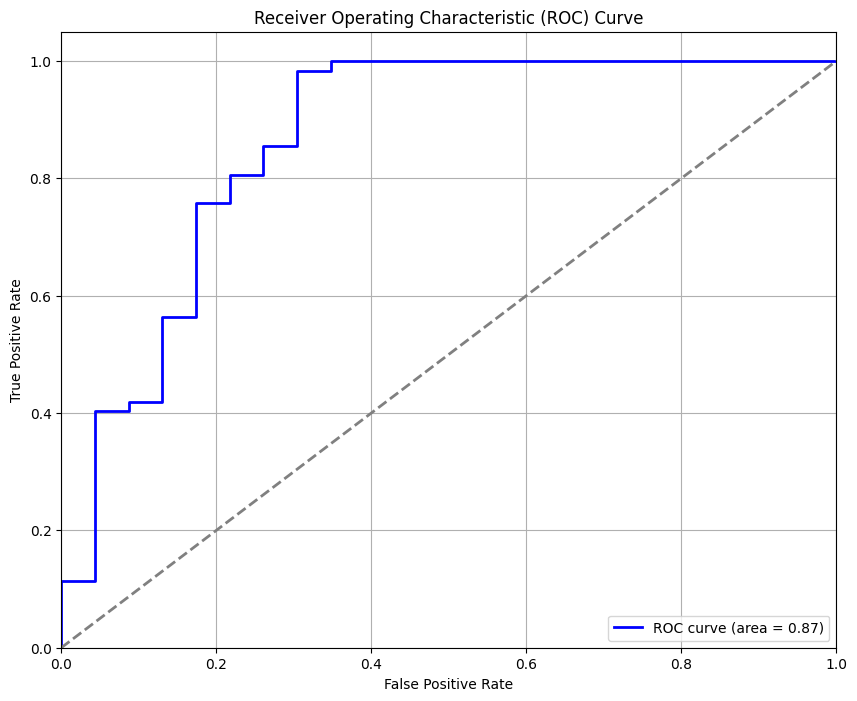

In [62]:

from sklearn.metrics import roc_curve, roc_auc_score


model.eval()
y_true = []
y_pred = []
y_prob = []

with torch.no_grad():
    for batch in tqdm(test_dataloader, desc="Evaluating"):
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        probabilities = torch.softmax(outputs.logits, dim=1)
        _, predicted = torch.max(outputs.logits, 1)
        
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        y_prob.extend(probabilities.cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_prob = np.array(y_prob)

class_index = 1
y_prob_class = y_prob[:, class_index]

label_map = np.array(["Positive", "Negative", "Neutral"])
y_true_str = label_map[y_true]
y_pred_str = label_map[y_pred]

fpr, tpr, thresholds = roc_curve(y_true == class_index, y_prob_class)
roc_auc = roc_auc_score(y_true == class_index, y_prob_class)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


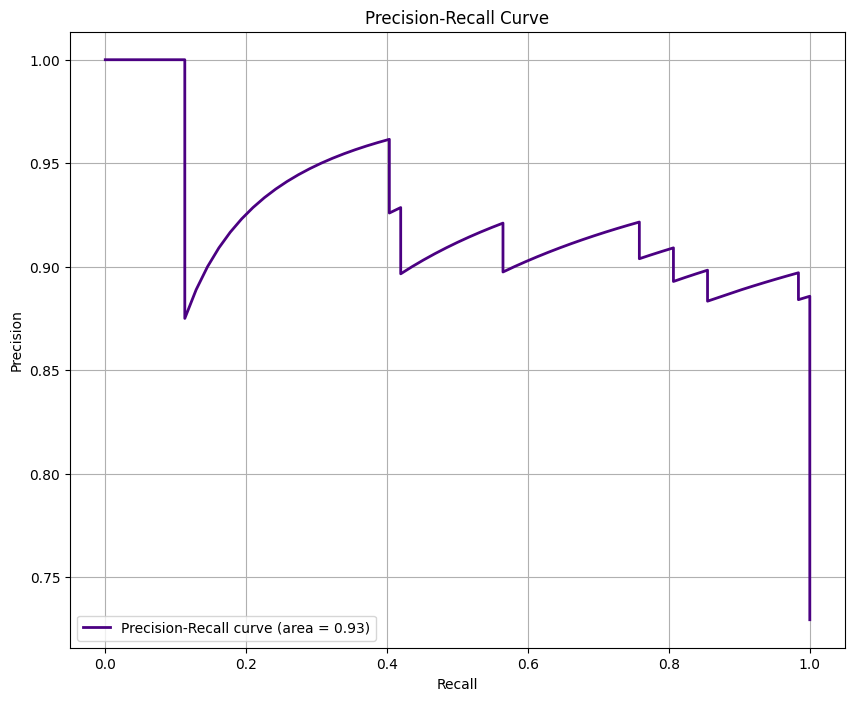

In [63]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds_pr = precision_recall_curve(y_true == class_index, y_prob_class)
average_precision = average_precision_score(y_true == class_index, y_prob_class)


plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='indigo', lw=2, label=f'Precision-Recall curve (area = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid()
plt.show()


In [64]:
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for batch in tqdm(test_dataloader, desc="Evaluating"):
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
      
        _, predicted = torch.max(outputs.logits, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

y_true = np.array(["Positive", "Negative", "Neutral"])[y_true]
y_pred = np.array(["Positive", "Negative", "Neutral"])[y_pred]

test_text = "I am extremely satisfied with the service provided by this company. The staff was very helpful and friendly, and the product exceeded my expectations. I would highly recommend their services to anyone looking for top-notch quality."


check_custom_data = tokenizer.encode_plus(test_text, max_length=max_len, add_special_tokens=True, return_token_type_ids=False,
                                          padding='max_length', return_attention_mask=True, return_tensors="pt")

input_ids = check_custom_data['input_ids'].to(device)
attention_mask = check_custom_data['attention_mask'].to(device)

output = model(input_ids, attention_mask)
# print("Output shape:", output.logits.shape)
# print("Output values:", output.logits)

_, prediction = torch.max(output.logits, dim=1)

print("====================================================================================================================")
print("Custom Text For Prediction ===> {}".format(test_text))
print("====================================================================================================================")
print("Prediction Result Is ===> {}".format(label_name[prediction]))
print("====================================================================================================================")


Evaluating: 100%|██████████| 11/11 [00:00<00:00, 17.33it/s]

Custom Text For Prediction ===> I am extremely satisfied with the service provided by this company. The staff was very helpful and friendly, and the product exceeded my expectations. I would highly recommend their services to anyone looking for top-notch quality.
Prediction Result Is ===> Positive
